# Programming for Data Science Series (Lab Session 11)
## Reading data with Pandas
### Objectives
We will learn how to read following data sources into dataframe using Pandas
* CSV
* JSON
* SQL Database

### Associated Tutorial for this Lab session is shown below:

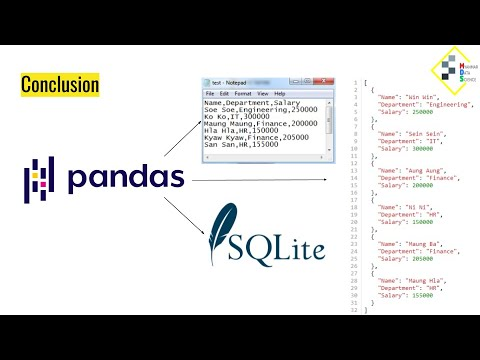

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('LN6MAxKEnNM', width=800, height=450)

### Reading CSV Data File
Use <b>read_csv()</b> method to read CSV data file

In [1]:
import pandas as pd

df = pd.read_csv('abc_ltd.csv')
df

,Name,Department,Salary
0,Win Win,Engineering,250000
1,Sein Sein,IT,300000
2,Aung Aung,Finance,200000
3,Ni Ni,HR,150000
4,Maung Ba,Finance,205000
5,Maung Hla,HR,155000


In [8]:
df = pd.read_csv('abc_ltd.csv', index_col=0)
df

,Department,Salary
Name,,
Win Win,Engineering,250000
Sein Sein,IT,300000
Aung Aung,Finance,200000
Ni Ni,HR,150000
Maung Ba,Finance,205000
Maung Hla,HR,155000


### Reading JSON Data File
Use <b>read_json()</b> method to read JSON data file

In [15]:
jdf = pd.read_json('abc_ltd.json')
df

,Department,Salary
Name,,
Win Win,Engineering,250000
Sein Sein,IT,300000
Aung Aung,Finance,200000
Ni Ni,HR,150000
Maung Ba,Finance,205000
Maung Hla,HR,155000


### Reading from database using SQL
We will use SQL lite Database to read with SQL query<br/>
This steps require installing <b>pysqlite3</b> library<br/>
SQLite can easily be installed be running the following command in Jupyter Notebook cell: <br/>
<b>!pip install pysqlite3</b>

In [16]:
!pip install pysqlite3

  Running setup.py bdist_wheel for pysqlite3: started
  Running setup.py bdist_wheel for pysqlite3: finished with status 'done'
  Running setup.py clean for pysqlite3
Failed to build pysqlite3
  Running setup.py install for pysqlite3: started
    Running setup.py install for pysqlite3: finished with status 'done'


You are using pip version 9.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [47]:
import sqlite3 as sql

In [48]:
conn = sql.connect('abc_ltd.db')

In [49]:
df = pd.read_sql_query('SELECT * FROM employee', conn)
df

,id,name,department,salary
0,1,Win Win,Engineering,250000
1,2,Sein Sein,IT,300000
2,3,Aung Aung,Finance,200000
3,4,Ni Ni,HR,150000
4,5,Maung Ba,Finance,205000
5,6,Maung Hla,HR,150000


In [50]:
print(conn)

In [51]:
df.set_index('id', inplace=True)
df

,name,department,salary
id,,,
1,Win Win,Engineering,250000
2,Sein Sein,IT,300000
3,Aung Aung,Finance,200000
4,Ni Ni,HR,150000
5,Maung Ba,Finance,205000
6,Maung Hla,HR,150000


In [52]:
df

,name,department,salary
id,,,
1,Win Win,Engineering,250000
2,Sein Sein,IT,300000
3,Aung Aung,Finance,200000
4,Ni Ni,HR,150000
5,Maung Ba,Finance,205000
6,Maung Hla,HR,150000


In [53]:
df = df.reset_index()

In [54]:
df

,id,name,department,salary
0,1,Win Win,Engineering,250000
1,2,Sein Sein,IT,300000
2,3,Aung Aung,Finance,200000
3,4,Ni Ni,HR,150000
4,5,Maung Ba,Finance,205000
5,6,Maung Hla,HR,150000


In [55]:
df = df.append({'id':7, 'name': 'Kyaw Kyaw', 'department':'Management', 'salary':500000}, ignore_index=True)

In [56]:
df

,id,name,department,salary
0,1,Win Win,Engineering,250000
1,2,Sein Sein,IT,300000
2,3,Aung Aung,Finance,200000
3,4,Ni Ni,HR,150000
4,5,Maung Ba,Finance,205000
5,6,Maung Hla,HR,150000
6,7,Kyaw Kyaw,Management,500000


### Converting back to CSV, JSON & SQL db
* use <i>to_csv()</i> method to store dataframe into CSV file
* use <i>to_json()</i> method to store dataframe into JSON file
* use <i>to_sql()</i> method to store dataframe into SQL database table
<b>Note: to_sql() method will add dataframe as a new table in our database, it will not export out as new .db file</b>

In [59]:
df.to_sql('new_employee', conn)

In [2]:
csv_df = df
csv_df

,Name,Department,Salary
0,Win Win,Engineering,250000
1,Sein Sein,IT,300000
2,Aung Aung,Finance,200000
3,Ni Ni,HR,150000
4,Maung Ba,Finance,205000
5,Maung Hla,HR,155000


In [3]:
csv_df.to_csv('new_abc_ltd.csv')

In [62]:
json_df = df
json_df

,id,name,department,salary
0,1,Win Win,Engineering,250000
1,2,Sein Sein,IT,300000
2,3,Aung Aung,Finance,200000
3,4,Ni Ni,HR,150000
4,5,Maung Ba,Finance,205000
5,6,Maung Hla,HR,150000
6,7,Kyaw Kyaw,Management,500000


In [63]:
json_df.to_json('new_abc_ltd.json')